In [1]:
import json # json을 사용하기 위한 라이브러리 호출
import re # 정규식을 표현 및 사용하기 위한 라이브러리 호출
from konlpy.tag import Twitter  # konlpy 사용을 위한 라이브러리 호출
from collections import Counter # dict 확장 데이터를 사용하기 위한 라이브러리 호출
import matplotlib.pyplot as plt # 그래프 사용을 위한 라이브러리 호출
import matplotlib # matplotlib 라이브러리 호출 
from matplotlib import font_manager,rc # 폰트매니저 사용을 위해 호출
import pytagcloud # 텍스트 클라우드를 사용하기 위한 라이브러리 호출
import urllib.request     # url 사용을 위한 라이브러리 호출
from bs4 import BeautifulSoup  # HTML 파싱을 위한 라이브러리 호출
import time # 시간 값을 사용하기 위한 라이브러리 호출
import pandas as pd # 판다스 사용을 위한 라이브러리 호출

In [5]:
def saveWordCloud(wordInfo,filename): # 텍스트 클라우드 정의
    taglist=pytagcloud.make_tags(dict(wordInfo).items(),maxsize=80) # wordInfo를 딕셔너리 형태로 호출, 최대사이즈 150으로 태그를 만듬
    pytagcloud.create_tag_image(taglist,filename,size=(900,600),fontname="Korean",rectangular=True) # 이미지를 생성함.

In [6]:
def showGraph(wordInfo): # 한글 폰트를 사용하기 위한 전초과정
    font_location="c:/windows/fonts/malgun.ttf" # 폰트 위치 지정
    font_name=font=font_manager.FontProperties(fname=font_location).get_name() 
     # 폰트 이름은 폰트 속성에서 이름을 가져옴
    matplotlib.rc('font',family=font_name)
    plt.rcParams["figure.figsize"] = (12,5) # 그래프 사이즈 조정
    plt.xlabel("주요단어") # x축 이름
    plt.ylabel("빈도수") # y축 이름
    plt.grid(True) # 그리드 사용 OK
    Sorted_Dict_values=sorted(wordInfo.values(),reverse=True) # y축 값 : 정렬된 글자 값 ( 역정렬 OK )
    Sorted_Dict_Keys=sorted(wordInfo, key=wordInfo.get, reverse=True) # x축 값 : 정렬된 글자 값 ( 역정렬 OK )
    #plt.figure(figsize=(12, 3)) 사이즈 조정 실패한 주석
    plt.bar(range(len(wordInfo)),Sorted_Dict_values,align='center') 
            #최대 빈도수 값, 바 형태의 그래프, wordInfo 길이만큼, y축값, 가운데 정렬로 
    plt.xticks(range(len(wordInfo)),list(Sorted_Dict_Keys),rotation='70') 
           #최대 빈도수 단어, x축 데이터 값은 위와 동일하게 + 70도 기울여서 배치 -> 글자 길이가 김 
    plt.show()    # 출력

In [4]:
#keyword = "북한"
#keyword = "김정은"
#keyword = "통일"
keyword = "남북 정상회담"

#keywords = "buk"
#keywords = "kim"
#keywords = "tong"
keywords = "nb"

# 방북 요청 전
since="2018-01-01" 
until="2018-02-06"

# 개최 합의
#since="2018-03-05"
#until="2018-03-10"

# 판문점 남북정상회담
#since="2018-04-27"
#until="2018-05-01"

In [28]:
openFileName="%s_%s_데이터.json"% (since, keyword) # 불러올 파일 이름    
cloudImageFile="%s_%s_wordcloud.jpg"% (since, keywords) # 저장할 파일 명
rfile=open(openFileName,'r',encoding='utf-8').read() # utf-8 인코딩으로 파일을 읽음
jsonData=json.loads(rfile) # json파일 -> json 데이터형식으로 불러옴
message="" # 다른 문자를 제거하기 위한 메세지 값 - 초기화
   
for item in jsonData:
    if 'text' in item.keys(): #각 값에서 타 문자를 제거하기 위함, 정규식으로 처리 된 것이므로 인터넷 참조함.
        message = message + re.sub(r'[^\w]','',item['text'])+''  # [^\w]는 글자형태의 값만 갖고온다, 위치는 description
               
nlp=Twitter() # konlpy사용을 위해 호출
nouns=nlp.nouns(message)  # 명사만 뽑아내어 nouns에 저장
#print(nouns)
count = Counter(nouns) # 명사의 빈도수를 저장함
#print(count)
wordInfo=dict()
for tags, counts in count.most_common(50): # TOP 50의 명사들을 추려 갖고오는 펑션
    if(len(str(tags))>1):
        wordInfo[tags]=counts  
#showGraph(wordInfo)
#saveWordCloud(wordInfo,cloudImageFile)
#print("%s:%d" %(tags,counts))
df=pd.DataFrame(count.most_common(50),columns=["키워드","빈도수"])
df.to_csv('%s_%s_중간.csv' %(since, keyword),encoding="cp949", mode="w",index=True)

In [2]:
key1 = "북한"
key2 = "김정은"
key3 = "통일"
key4 = "남북 정상회담"

# 방북 요청 전
sin1="2018-01-01" 

# 개최 합의
sin2="2018-03-05"

# 판문점 남북정상회담
sin3="2018-04-27"

buk1_df=pd.read_csv("%s_%s_중간.csv"% (sin1,key1),sep=",",encoding='euc-kr',engine="python")
buk2_df=pd.read_csv("%s_%s_중간.csv"% (sin2,key1),sep=",",encoding='euc-kr',engine="python")
buk3_df=pd.read_csv("%s_%s_중간.csv"% (sin3,key1),sep=",",encoding='euc-kr',engine="python")
kim1_df=pd.read_csv("%s_%s_중간.csv"% (sin1,key2),sep=",",encoding='euc-kr',engine="python")
kim2_df=pd.read_csv("%s_%s_중간.csv"% (sin2,key2),sep=",",encoding='euc-kr',engine="python")
kim3_df=pd.read_csv("%s_%s_중간.csv"% (sin3,key2),sep=",",encoding='euc-kr',engine="python")
tong1_df=pd.read_csv("%s_%s_중간.csv"% (sin1,key3),sep=",",encoding='euc-kr',engine="python")
tong2_df=pd.read_csv("%s_%s_중간.csv"% (sin2,key3),sep=",",encoding='euc-kr',engine="python")
tong3_df=pd.read_csv("%s_%s_중간.csv"% (sin3,key3),sep=",",encoding='euc-kr',engine="python")
nb1_df=pd.read_csv("%s_%s_중간.csv"% (sin1,key4),sep=",",encoding='euc-kr',engine="python")
nb2_df=pd.read_csv("%s_%s_중간.csv"% (sin2,key4),sep=",",encoding='euc-kr',engine="python")
nb3_df=pd.read_csv("%s_%s_중간.csv"% (sin3,key4),sep=",",encoding='euc-kr',engine="python")
#csv 읽어옴

In [3]:
buk1_df=buk1_df.drop("Unnamed: 0",axis=1)
buk2_df=buk2_df.drop("Unnamed: 0",axis=1)
buk3_df=buk3_df.drop("Unnamed: 0",axis=1)
kim1_df=kim1_df.drop("Unnamed: 0",axis=1)
kim2_df=kim2_df.drop("Unnamed: 0",axis=1)
kim3_df=kim3_df.drop("Unnamed: 0",axis=1)
tong1_df=tong1_df.drop("Unnamed: 0",axis=1)
tong2_df=tong2_df.drop("Unnamed: 0",axis=1)
tong3_df=tong3_df.drop("Unnamed: 0",axis=1)
nb1_df=nb1_df.drop("Unnamed: 0",axis=1)
nb2_df=nb2_df.drop("Unnamed: 0",axis=1)
nb3_df=nb3_df.drop("Unnamed: 0",axis=1)
#첫번째 Unnamed: 0 열 제거

In [4]:
buk1_df=buk1_df.set_index("키워드")
buk2_df=buk2_df.set_index("키워드")
buk3_df=buk3_df.set_index("키워드")
kim1_df=kim1_df.set_index("키워드")
kim2_df=kim2_df.set_index("키워드")
kim3_df=kim3_df.set_index("키워드")
tong1_df=tong1_df.set_index("키워드")
tong2_df=tong2_df.set_index("키워드")
tong3_df=tong3_df.set_index("키워드")
nb1_df=nb1_df.set_index("키워드")
nb2_df=nb2_df.set_index("키워드")
nb3_df=nb3_df.set_index("키워드")
# 인덱스를 키워드로 설정

In [5]:
buk1_2_df=pd.merge(buk1_df,buk2_df,how="outer",left_index=True,right_index=True)
buk_A_df=pd.merge(buk1_2_df,buk3_df,how="outer",left_index=True,right_index=True)
buk_A_df.columns = buk_A_df.columns.str.replace('빈도수_x','방북 요청 전')
buk_A_df.columns = buk_A_df.columns.str.replace('빈도수_y','개최 합의')
buk_A_df.columns = buk_A_df.columns.str.replace('빈도수','정상회담 후')
buk_A_df = buk_A_df.fillna(0)
buk_A_df[:]
# 병합 후 북한 키워드로 분석한 결과 (전체)

방북 요청 전   개최 합의  정상회담 후
키워드                            
것         734.0   910.0  1006.0
경제          0.0   527.0   731.0
공기        567.0     0.0     0.0
공연        468.0     0.0     0.0
국가        520.0   532.0   625.0
국민        881.0   640.0   759.0
김정은      1058.0  2807.0  2766.0
남북        874.0  1084.0  1426.0
남북정상회담      0.0     0.0   848.0
남한        682.0   880.0  1606.0
년         674.0   947.0   998.0
뉴스        822.0   817.0   731.0
단         588.0     0.0     0.0
대북          0.0   654.0     0.0
대통령       961.0  1999.0  1417.0
대한민국      866.0   668.0   698.0
대화          0.0  1090.0     0.0
더           0.0   594.0   700.0
땅         627.0   594.0   665.0
때         640.0   863.0   925.0
말         460.0   721.0   783.0
명         824.0     0.0     0.0
못         543.0     0.0   628.0
문재인      1065.0  1330.0  1271.0
문제        593.0   740.0   699.0
미국       2121.0  3231.0  1767.0
미사일       489.0   719.0     0.0
백악관         0.0   527.0     0.0
북           0.0   639.0     0.0
북미          0.0   947.0     0.0
...         ...     ...     ...
일본        632.0  1048.0  1121.0
입장          0.0   554.0     0.0
자유        509.0     0.0     0.0
전쟁        826.0   585.0   570.0
정권        928.0   755.0   642.0
정부        989.0   562.0     0.0
정상회담        0.0   802.0   634.0
정치        471.0     0.0     0.0
중국        611.0   900.0   879.0
지금        470.0   725.0   763.0
진짜          0.0     0.0   651.0
체제          0.0   633.0     0.0
출처        468.0     0.0     0.0
태극기       568.0     0.0     0.0
통일          0.0   975.0  1532.0
트럼프      1049.0  2941.0   940.0
특사          0.0   861.0     0.0
팀         521.0     0.0     0.0
판문점         0.0     0.0   834.0
평양          0.0     0.0   641.0
평창        892.0     0.0     0.0
평창올림픽     910.0     0.0     0.0
평화        681.0  1117.0  1194.0
폐기          0.0     0.0   571.0
표준          0.0     0.0  1527.0
한국       1807.0  2011.0  1950.0
한반도         0.0   942.0   772.0
핵         673.0  1877.0  1371.0
핵실험         0.0     0.0   674.0
회담          0.0   534.0   854.0

[79 rows x 3 columns]

In [6]:
#buk1_2_df=pd.merge(buk1_df,buk2_df,how="outer",left_index=True,right_index=True) # 전체 집합
#buk_df=pd.merge(buk1_2_df,buk3_df,how="outer",left_index=True,right_index=True) # 전체 집합
buk1_2_df=pd.merge(buk1_df,buk2_df,how="inner",left_index=True,right_index=True) # 공 집합
buk_df=pd.merge(buk1_2_df,buk3_df,how="inner",left_index=True,right_index=True) # 공 집합
buk_df.columns = buk_df.columns.str.replace('빈도수_x','방북 요청 전')
buk_df.columns = buk_df.columns.str.replace('빈도수_y','개최 합의')
buk_df.columns = buk_df.columns.str.replace('빈도수','정상회담 후')
buk_df[:]
# 병합 후 북한 키워드로 분석한 결과 (공집합)

방북 요청 전  개최 합의  정상회담 후
키워드                         
북한      17533  19465   21036
미국       2121   3231    1767
한국       1807   2011    1950
문재인      1065   1330    1271
김정은      1058   2807    2766
트럼프      1049   2941     940
대통령       961   1999    1417
우리        956    982    1640
정권        928    755     642
일         913    885     880
국민        881    640     759
남북        874   1084    1426
대한민국      866    668     698
전쟁        826    585     570
뉴스        822    817     731
사람        765    702    1355
것         734    910    1006
남한        682    880    1606
평화        681   1117    1194
년         674    947     998
핵         673   1877    1371
때         640    863     925
일본        632   1048    1121
땅         627    594     665
중국        611    900     879
문제        593    740     699
국가        520    532     625
지금        470    725     763
말         460    721     783

In [7]:
#kim1_2_df=pd.merge(kim1_df,kim2_df,how="outer",left_index=True,right_index=True) # 전체 집합
#kim_df=pd.merge(kim1_2_df,kim3_df,how="outer",left_index=True,right_index=True) # 전체 집합
kim1_2_df=pd.merge(kim1_df,kim2_df,how="inner",left_index=True,right_index=True) # 공 집합
kim_df=pd.merge(kim1_2_df,kim3_df,how="inner",left_index=True,right_index=True) # 공 집합
kim_df.columns = kim_df.columns.str.replace('빈도수_x','방북 요청 전')
kim_df.columns = kim_df.columns.str.replace('빈도수_y','개최 합의')
kim_df.columns = kim_df.columns.str.replace('빈도수','정상회담 후')
kim_df[:]
# 병합 후 김정은 키워드로 분석한 결과 (공집합)

방북 요청 전  개최 합의  정상회담 후
키워드                         
김정은     18368  16535   17641
북한       4371   2924    2723
문재인      2781   2356    3332
대한민국     1430    424     528
대통령      1351   3246    3010
국민       1306    398     606
핵        1087   1313     823
한국       1051    777     665
트럼프      1043   7008    1742
미국       1034   1521     755
뉴스        842   1422    1056
우리        810    541     872
남북        710    558     916
평화        680    769    1247
문         641    718     590
일         640    433     581
것         639    527     650
사람        615    425    1210
북         480    622     518
때         463    398     625
출처        458    532     535

In [9]:
#tong1_2_df=pd.merge(tong1_df,tong2_df,how="outer",left_index=True,right_index=True) # 전체 집합
#tong_df=pd.merge(tong1_2_df,tong3_df,how="outer",left_index=True,right_index=True) # 전체 집합
tong1_2_df=pd.merge(tong1_df,tong2_df,how="inner",left_index=True,right_index=True) # 공 집합
tong_df=pd.merge(tong1_2_df,tong3_df,how="inner",left_index=True,right_index=True) # 공 집합
tong_df.columns = tong_df.columns.str.replace('빈도수_x','방북 요청 전')
tong_df.columns = tong_df.columns.str.replace('빈도수_y','개최 합의')
tong_df.columns = tong_df.columns.str.replace('빈도수','정상회담 후')
tong_df[:]
# 병합 후 통일 키워드로 분석한 결과 (공집합)

방북 요청 전  개최 합의  정상회담 후
키워드                        
통일     18880   9159   20371
평화      2296    840    1985
북한      2208   1349    2598
우리      1463    656    1372
남북      1273    437    1474
민족      1067    316     513
때       1037    438    1360
년       1024    362     814
한국       895    321     695
사람       883    322     984
대통령      838    739     987
국민       830    280     459
문재인      817    439     743
한반도      781    480    1159
것        780    308     542
전쟁       738    328     680
일        686    420     772
지금       611    326     739
국가       589    256     605
말        564    234     502
진짜       564    508    1546
북        562    246     465
생각       551    283     742
너무       543    262     749
더        542    264     766
뭐        488    258     561
문제       488    238     438
거        478    216     462
뉴스       436    223     695
김정은      434    563    1164

In [8]:
#nb1_2_df=pd.merge(nb1_df,nb2_df,how="outer",left_index=True,right_index=True) # 전체 집합
#nb_df=pd.merge(nb1_2_df,nb3_df,how="outer",left_index=True,right_index=True) # 전체 집합
nb1_2_df=pd.merge(nb1_df,nb2_df,how="inner",left_index=True,right_index=True) # 공 집합
nb_df=pd.merge(nb1_2_df,nb3_df,how="inner",left_index=True,right_index=True) # 공 집합
nb_df.columns = nb_df.columns.str.replace('빈도수_x','방북 요청 전')
nb_df.columns = nb_df.columns.str.replace('빈도수_y','개최 합의')
nb_df.columns = nb_df.columns.str.replace('빈도수','정상회담 후')
nb_df[:]
# 병합 후 남북 정상회담 키워드로 분석한 결과 (공집합)

방북 요청 전  개최 합의  정상회담 후
키워드                           
남북정상회담     5506   5250   15442
대통령        1542   1113    2167
문재인        1016    766    1674
년          1013    261     589
북한          912    757    1052
남북          741   1154    1586
정상회담        421   1413    1003
일           409    221     849
뉴스          394    749    1723
월           386   1236     459
김정은         307    856    1643
회담          294    323     919
평화          289   1149    3929
문           269    315     449

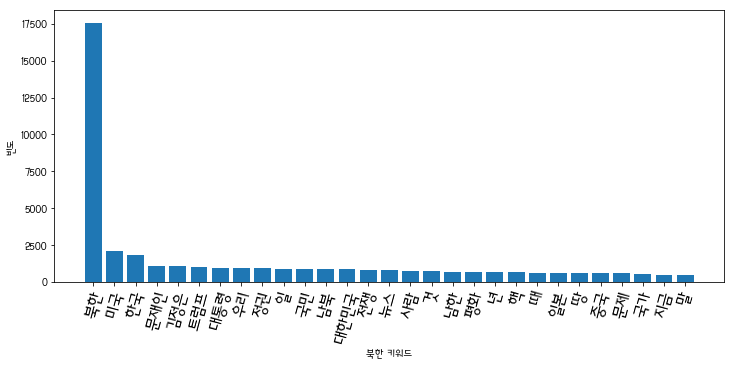

In [11]:
font_location="C:/Windows/Fonts/a나무L.ttf" 
font_name=font_manager.FontProperties(fname=font_location).get_name() 
matplotlib.rc('font',family=font_name)
plt.rcParams["figure.figsize"] = (12,5)
matplotlib.pyplot.xticks(fontsize=16)
sorted(buk_df.index,reverse=True)     
plt.bar(sorted(buk_df.index,reverse=False), buk_df["방북 요청 전"])
plt.xticks(sorted(buk_df.index,reverse=False), buk_df.index, rotation='75')
plt.xlabel('북한 키워드') 
plt.ylabel('빈도') 
plt.show()
# 북한 키워드 빈도 그래프

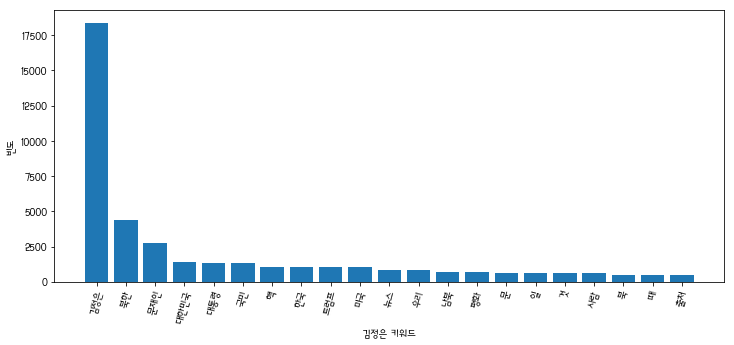

In [134]:
sorted(kim_df.index,reverse=True)     
plt.bar(sorted(kim_df.index,reverse=False), kim_df["방북 요청 전"])
plt.xticks(sorted(kim_df.index,reverse=False), kim_df.index, rotation='75')
plt.xlabel('김정은 키워드') 
plt.ylabel('빈도') 
plt.show()
# 김정은 키워드 빈도 그래프

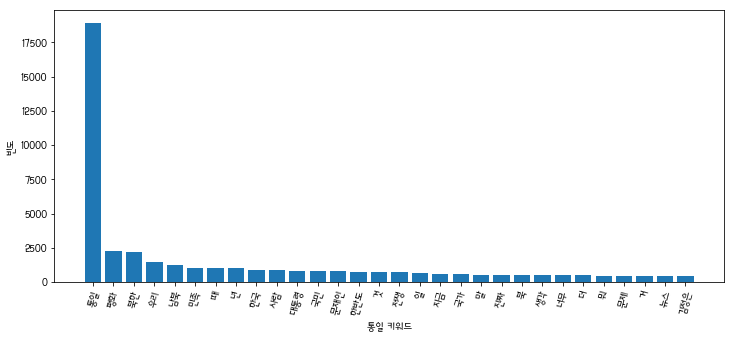

In [13]:
sorted(tong_df.index,reverse=True)     
plt.bar(sorted(tong_df.index,reverse=False), tong_df["방북 요청 전"])
plt.xticks(sorted(tong_df.index,reverse=False), tong_df.index, rotation='75')
plt.xlabel('통일 키워드') 
plt.ylabel('빈도') 
plt.show()
# 통일 키워드 빈도 그래프

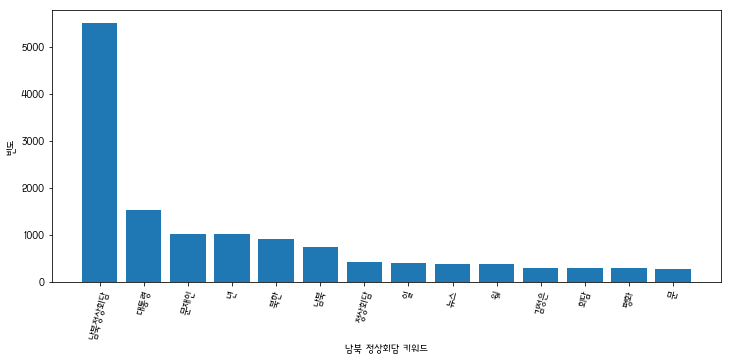

In [135]:
sorted(nb_df.index,reverse=True)     
plt.bar(sorted(nb_df.index,reverse=False), nb_df["방북 요청 전"])
plt.xticks(sorted(nb_df.index,reverse=False), nb_df.index, rotation='75')
plt.xlabel('남북 정상회담 키워드') 
plt.ylabel('빈도') 
plt.show()
# 남북 정상회담 키워드 빈도 그래프

In [129]:
# 북한 키워드 : 요청 전, 합의, 회담 후 증가하는 키워드만 나타내줌
i = 0
buk_result = []
while(1):
    if (buk_df["방북 요청 전"][i] < buk_df["개최 합의"][i]):
        if (buk_df["개최 합의"][i] < buk_df["정상회담 후"][i]):
            buk_result.append({"%s" %(buk_df.index[i])}) # append 사용 -> 각 값들 저장
    i+=1    
    if i==len(buk_df.index):
        break;
print(buk_result)

[{'북한'}, {'우리'}, {'남북'}, {'것'}, {'남한'}, {'평화'}, {'년'}, {'때'}, {'일본'}, {'국가'}, {'지금'}, {'말'}]


In [16]:
# 김정은 키워드 : 요청 전, 합의, 회담 후 증가하는 키워드만 나타내줌
i = 0
kim_result = []
while(1):
    if (kim_df["방북 요청 전"][i] < kim_df["개최 합의"][i]):
        if (kim_df["개최 합의"][i] < kim_df["정상회담 후"][i]):
            kim_result.append({"%s" %(kim_df.index[i])}) # append 사용 -> 각 값들 저장
    i+=1    
    if i==len(kim_df.index):
        break;
print(kim_result)

[{'평화'}, {'출처'}]


In [15]:
# 통일 키워드 : 요청 전, 합의, 회담 후 증가하는 키워드만 나타내줌
i = 0
tong_result = []
while(1):
    if (tong_df["방북 요청 전"][i] < tong_df["개최 합의"][i]):
        if (tong_df["개최 합의"][i] < tong_df["정상회담 후"][i]):
            tong_result.append({"%s" %(tong_df.index[i])}) # append 사용 -> 각 값들 저장
    i+=1    
    if i==len(tong_df.index):
        break;
print(tong_result)

[{'김정은'}]


In [127]:
# 남북 정상회담 키워드 : 요청 전, 합의, 회담 후 증가하는 키워드만 나타내줌
i = 0
nb_result = []
while(1):
    if (nb_df["방북 요청 전"][i] < nb_df["개최 합의"][i]):
        if (nb_df["개최 합의"][i] < nb_df["정상회담 후"][i]):
            nb_result.append({"%s" %(nb_df.index[i])}) # append 사용 -> 각 값들 저장
    i+=1    
    if i==len(nb_df.index):
        break;
print(nb_result)

[{'남북'}, {'뉴스'}, {'김정은'}, {'회담'}, {'평화'}, {'문'}]


In [130]:
# 북한 키워드 : 요청 전, 합의, 회담 후 감소하는 키워드만 나타내줌
i = 0
buk_result = []
while(1):
    if (buk_df["방북 요청 전"][i] > buk_df["개최 합의"][i]):
        if (buk_df["개최 합의"][i] > buk_df["정상회담 후"][i]):
            buk_result.append({"%s" %(buk_df.index[i])}) # append 사용 -> 각 값들 저장
    i+=1    
    if i==len(buk_df.index):
        break;
print(buk_result)

[{'정권'}, {'일'}, {'전쟁'}, {'뉴스'}]


In [131]:
# 김정은 키워드 : 요청 전, 합의, 회담 후 감소하는 키워드만 나타내줌
i = 0
kim_result = []
while(1):
    if (kim_df["방북 요청 전"][i] > kim_df["개최 합의"][i]):
        if (kim_df["개최 합의"][i] > kim_df["정상회담 후"][i]):
            kim_result.append({"%s" %(kim_df.index[i])}) # append 사용 -> 각 값들 저장
    i+=1    
    if i==len(kim_df.index):
        break;
print(kim_result)

[{'북한'}, {'한국'}]


In [17]:
# 통일 키워드 : 요청 전, 합의, 회담 후 감소하는 키워드만 나타내줌
i = 0
tong_result = []
while(1):
    if (tong_df["방북 요청 전"][i] > tong_df["개최 합의"][i]):
        if (tong_df["개최 합의"][i] > tong_df["정상회담 후"][i]):
            tong_result.append({"%s" %(tong_df.index[i])}) # append 사용 -> 각 값들 저장
    i+=1    
    if i==len(tong_df.index):
        break;
print(tong_result)

[]


In [132]:
# 남북 정상회담 키워드 : 요청 전, 합의, 회담 후 감소하는 키워드만 나타내줌
i = 0
nb_result = []
while(1):
    if (nb_df["방북 요청 전"][i] > nb_df["개최 합의"][i]):
        if (nb_df["개최 합의"][i] > nb_df["정상회담 후"][i]):
            nb_result.append({"%s" %(nb_df.index[i])}) # append 사용 -> 각 값들 저장
    i+=1    
    if i==len(nb_df.index):
        break;
print(nb_result)

[]


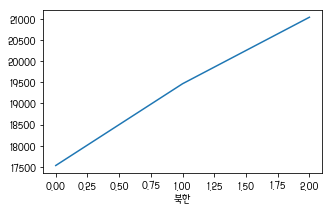

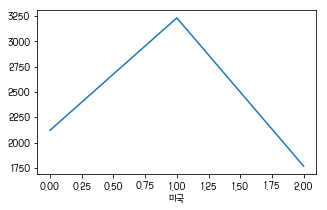

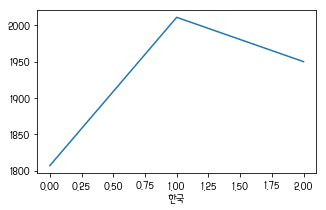

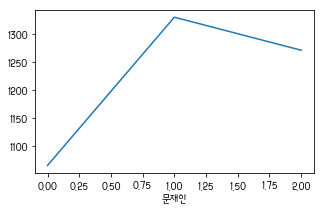

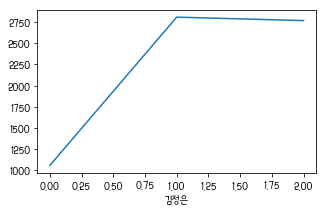

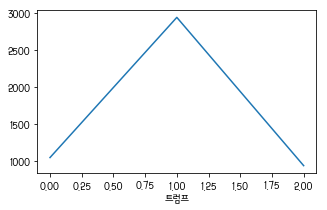

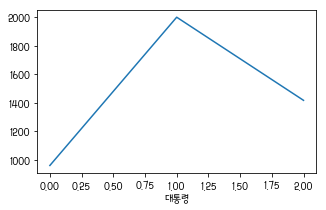

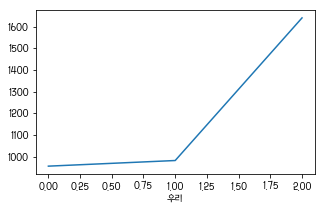

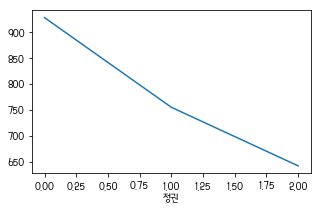

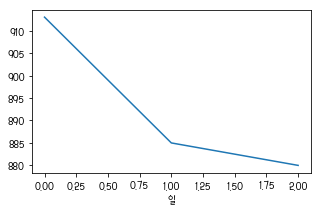

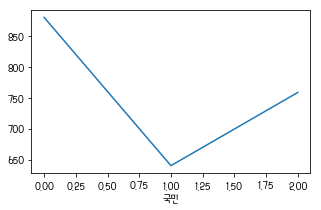

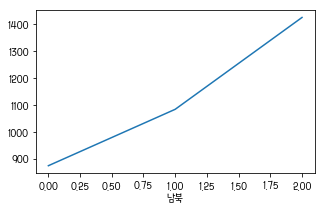

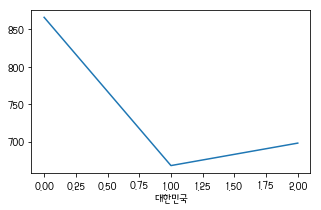

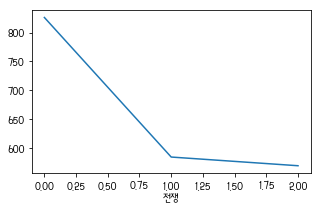

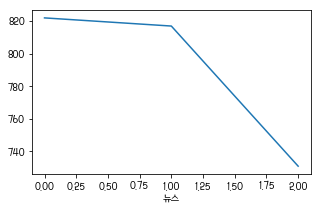

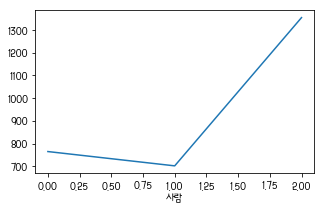

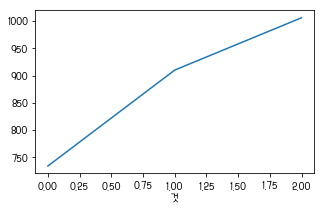

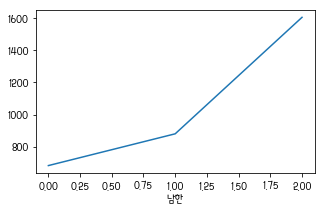

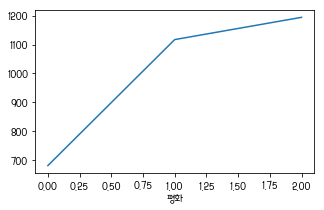

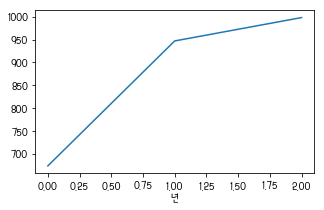

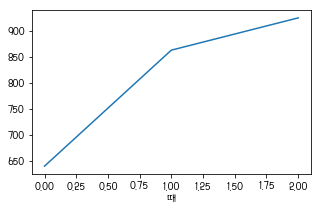

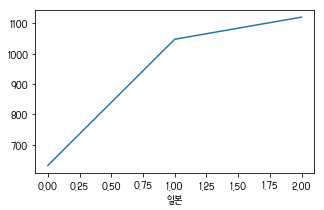

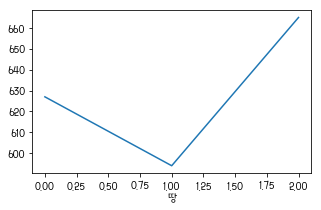

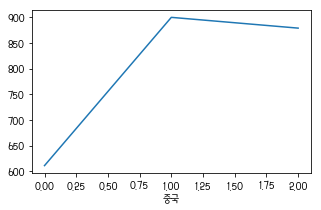

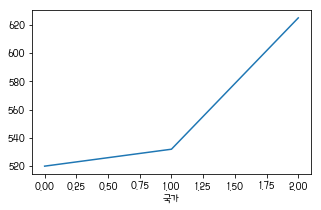

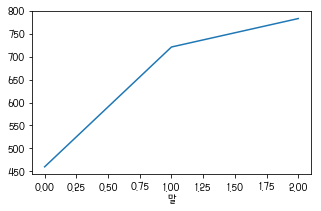

In [137]:
# 그래프로 그림
i=0
plt.rcParams["figure.figsize"] = (5,3)
while(1):
    plt.plot([buk_df["방북 요청 전"][i],buk_df["개최 합의"][i], buk_df["정상회담 후"][i]])
    plt.xlabel(buk_df.index[i]) 
    i+=1
    plt.show()
    if i==len(buk_df.index):
        break;

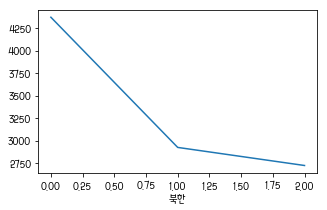

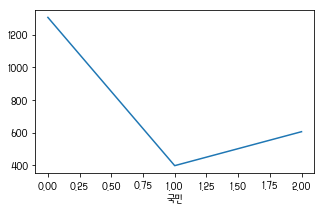

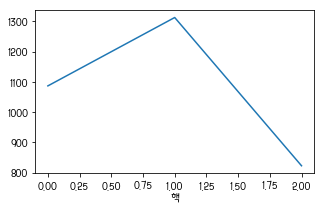

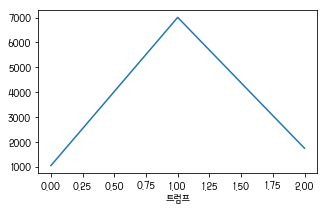

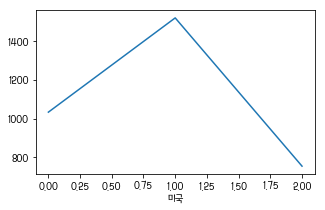

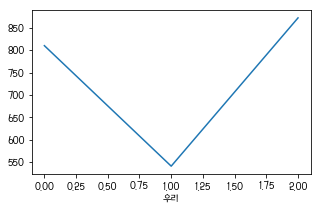

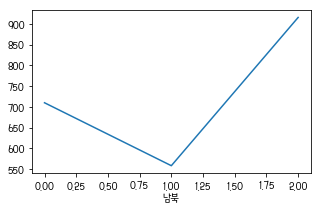

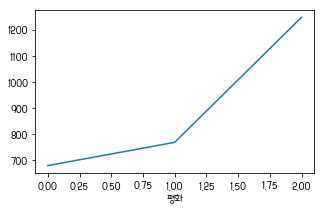

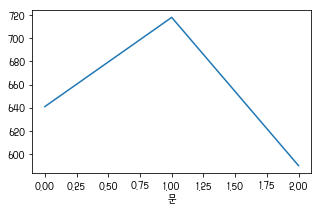

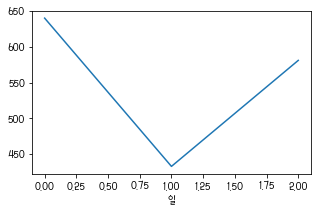

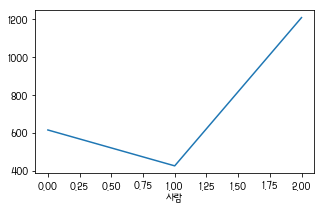

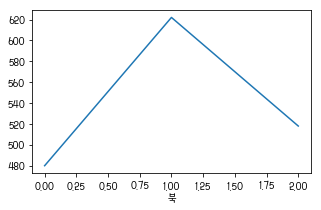

In [115]:
i=0
plt.rcParams["figure.figsize"] = (5,3)
while(1):
    plt.plot([kim_df["방북 요청 전"][i],kim_df["개최 합의"][i], kim_df["정상회담 후"][i]])
    plt.xlabel(kim_df.index[i]) 
    i+=1
    plt.show()
    if i==len(kim_df.index):
        break;

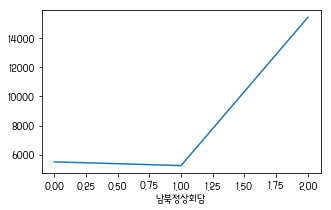

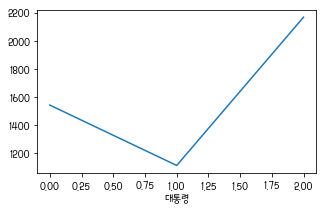

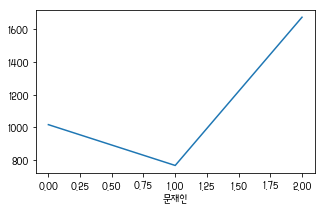

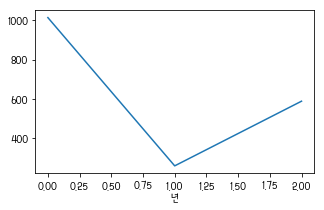

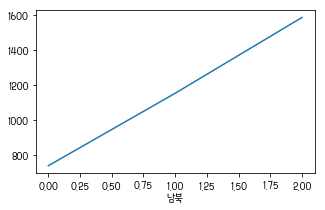

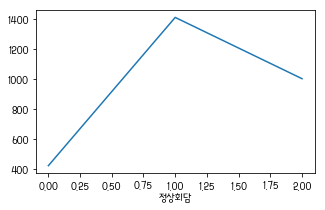

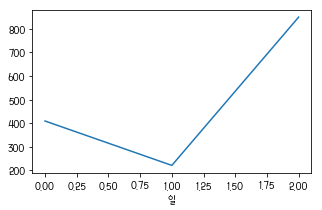

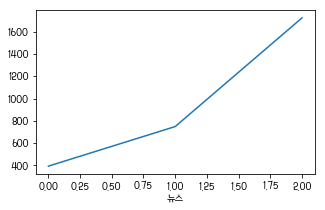

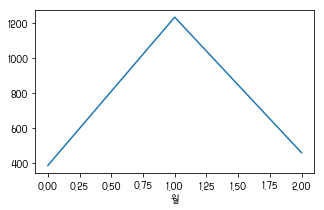

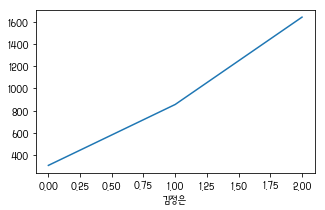

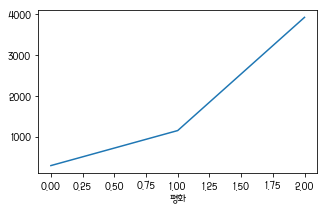

In [116]:
i=0
plt.rcParams["figure.figsize"] = (5,3)
while(1):
    plt.plot([nb_df["방북 요청 전"][i],nb_df["개최 합의"][i], nb_df["정상회담 후"][i]])
    plt.xlabel(nb_df.index[i]) 
    i+=1
    plt.show()
    if i==len(nb_df.index):
        break;

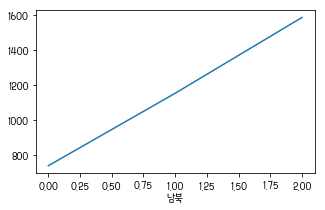

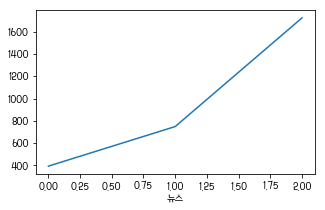

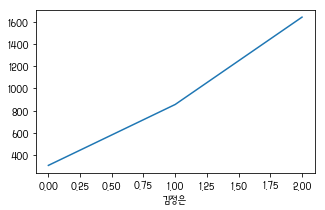

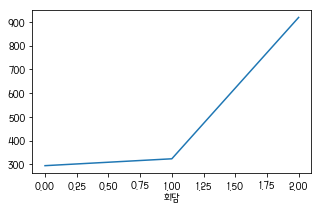

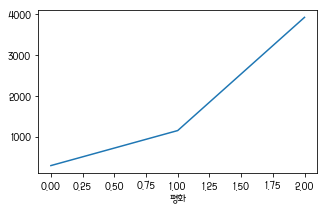

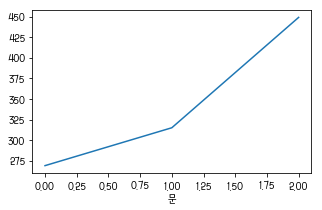

In [120]:
# 증가하는 것만 나타냄
i=0
plt.rcParams["figure.figsize"] = (5,3)
while(1):
    if (buk_df["방북 요청 전"][i] < buk_df["개최 합의"][i]):
        if (buk_df["개최 합의"][i] < buk_df["정상회담 후"][i]):
            plt.plot([buk_df["방북 요청 전"][i],buk_df["개최 합의"][i], buk_df["정상회담 후"][i]])
            plt.xlabel(buk_df.index[i])
            plt.show()
    i+=1    
    if i==len(buk_df.index):
        break;

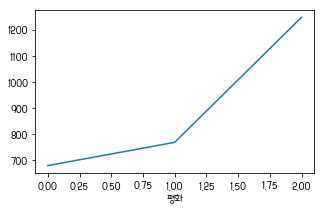

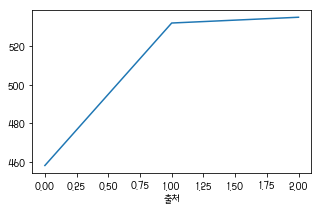

In [121]:
# 증가하는 것만 나타냄
i=0
plt.rcParams["figure.figsize"] = (5,3)
while(1):
    if (kim_df["방북 요청 전"][i] < kim_df["개최 합의"][i]):
        if (kim_df["개최 합의"][i] < kim_df["정상회담 후"][i]):
            plt.plot([kim_df["방북 요청 전"][i],kim_df["개최 합의"][i], kim_df["정상회담 후"][i]])
            plt.xlabel(kim_df.index[i])
            plt.show()
    i+=1    
    if i==len(kim_df.index):
        break;

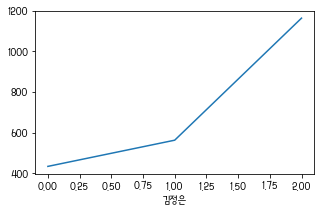

In [18]:
# 증가하는 것만 나타냄
i=0
plt.rcParams["figure.figsize"] = (5,3)
while(1):
    if (tong_df["방북 요청 전"][i] < tong_df["개최 합의"][i]):
        if (tong_df["개최 합의"][i] < tong_df["정상회담 후"][i]):
            plt.plot([tong_df["방북 요청 전"][i],tong_df["개최 합의"][i], tong_df["정상회담 후"][i]])
            plt.xlabel(tong_df.index[i])
            plt.show()
    i+=1    
    if i==len(tong_df.index):
        break;

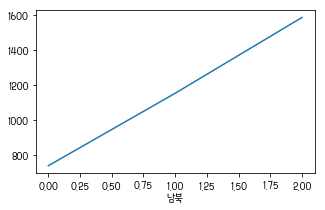

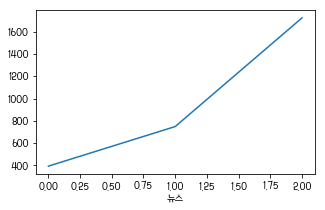

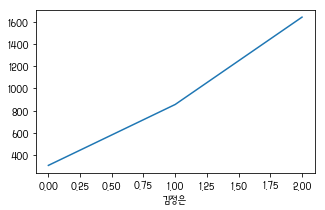

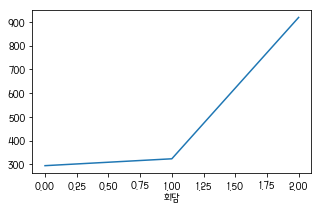

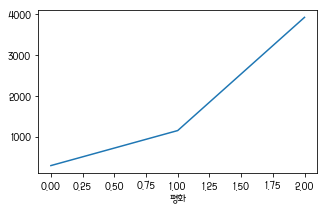

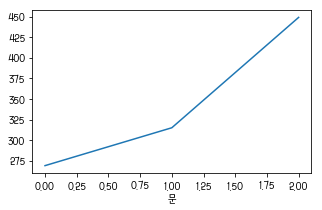

In [122]:
# 증가하는 것만 나타냄
i=0
plt.rcParams["figure.figsize"] = (5,3)
while(1):
    if (nb_df["방북 요청 전"][i] < nb_df["개최 합의"][i]):
        if (nb_df["개최 합의"][i] < nb_df["정상회담 후"][i]):
            plt.plot([nb_df["방북 요청 전"][i],nb_df["개최 합의"][i], nb_df["정상회담 후"][i]])
            plt.xlabel(nb_df.index[i])
            plt.show()
    i+=1    
    if i==len(nb_df.index):
        break;